# radial basis function neural networks(RBFNNs)

In [1]:
%matplotlib inline 
from IPython.core.display import display

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from sympy import *
init_printing()
#from math import *
from interval import interval
from interval import imath as im
import sys
from pprint import pprint

## $NN(x_1, x_2) = exp(-4(x_1 - 1)^2  -  6(x_2 - 0.5)^2) + exp(-7(x_1+1.5)^2 - 9(x_2+1)^2)$
where $x_1 \in [-2,2], x_2 \in [-2,2]$

### グラフの可視化

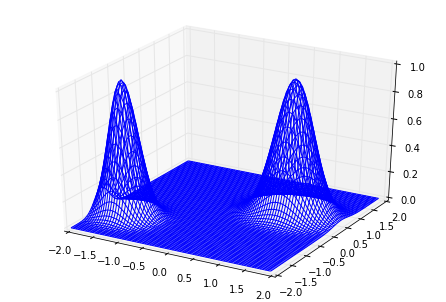

In [2]:
def activate_func(x):
    """
    params:
        x = np.array([x_1, x_2])
    """
    return np.exp(-4*((x[0]-1)**2) - 6*((x[1]-0.5)**2)) + \
        np.exp(-7*((x[0]+1.5)**2) - 9*((x[1]+1)**2))
    

x = y = np.arange(-2, 2, 0.05) 
X, Y = np.meshgrid(x, y)

Z = np.apply_along_axis(activate_func, 0, np.array([X.flatten(), Y.flatten()]))
Z = Z.reshape(X.shape)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z) #<---ここでplot

plt.show()

NN(x_1, x_2)


nn.diff(x_1)


nn.diff(x_2)


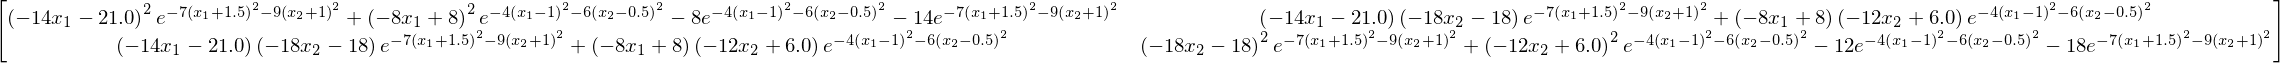

In [3]:
x_1, x_2, x_3 = var("x_1 x_2 x_3")
f_x_1 = symbols("f_x_1", cls=Function)
f_x_2 = symbols("f_x_2", cls=Function)
nn = exp(-4*(x_1-1)**2 - 6*(x_2-0.5)**2) + exp(-7*(x_1+1.5)**2 - 9*(x_2+1)**2)
grad_f_x_1 = str(nn.diff(x_1))
f_x_1 = lambda x_1,x_2,exp: eval(grad_f_x_1)
grad_f_x_2 = str(nn.diff(x_2))
f_x_2 = lambda x_1,x_2,exp: eval(grad_f_x_2)

print "NN(x_1, x_2)"
display(nn)
print "nn.diff(x_1)"
display(nn.diff(x_1))
print "nn.diff(x_2)"
display(nn.diff(x_2))

print
print
display(nn.diff(x_1).diff(x_1))
display(nn.diff(x_1).diff(x_2))
display(nn.diff(x_2).diff(x_1))
display(nn.diff(x_2).diff(x_2))
print
print
hes = hessian(nn, (x_1,x_2))
display(hes)

In [4]:
iv_func_eval = lambda func, x_1,x_2,exp: eval(str(func))

A = []
for i in range(2):
    A_row = []
    for j in range(2):
        x_1 = interval[-2,2]
        x_2 = interval[-2,2]
        #print iv_func_eval(hes[i,j], interval[-1,1], interval[-1,1], im.exp)
        #print iv_func_eval(hes[i,j], 1, 1, im.exp)
        tmp = iv_func_eval(hes[i,j], x_1.midpoint, x_2.midpoint, im.exp)
        A_row.append(tmp.midpoint[0][0])
    A.append(A_row)
A = np.array(A)
print A

[[ 0.22885921  0.19616504]
 [ 0.19616504  0.09808252]]


In [5]:
def linear_equation_by_krawczyk(A,b,Y=None):
    """
    A = np.array([[3,1],[3,2]])
    b = np.array([1,0])
    Y ~= A^{-1}
    """
    def dot(x,y):
        mat = [[0]*len(y[0]) for i in range(len(x))]
        for i in range(len(x)):
            for j in range(len(y[0])):
                sum = 0
                for k in range(len(x[0])):
                    sum = sum + x[i][k] * y[k][j]
                mat[i][j] = sum
        return mat

    def add(x,y):
        res = map(lambda a: a[0][0]+a[1][0], zip(x,y))
        return map(lambda x: [x], res)

    def iteration(Y,b, E, X):
        left = np.dot(Y,b).reshape(len(X),1).tolist()
        right = dot(E.tolist(), X)
        NX = add(left, right)
        return map(lambda (x,y): [x[0]&y[0]], zip(NX,X_0))
    
    norm = lambda x : np.linalg.norm(x, np.inf)
    f_num = A.shape[0]
    variable_num = A.shape[1]
    if Y is None:
        Y = np.around(np.linalg.pinv(A), decimals=2)
        print 'Y' ,Y
        print
    E = np.eye(f_num) - np.dot(Y,A)
    X_0 = [[interval[-1,1] * norm(np.dot(Y,b)) / (1 - norm(E))] for i in range(variable_num)]
    print '-----'*10
    print 'X_0', X_0
    print 'Y', Y
    print 'b', b
    print np.dot(Y,b)
    print '-----'*10
    next_X = X_0
    for i in range(5):
        #print i, next_X
        print 'iteration times : %d'  % i
        pprint(next_X)
        print
        next_X = iteration(Y, b, E, next_X)

In [6]:
b = np.array([0,0])
print 'A', A
Y = np.around(np.linalg.pinv(A), decimals=2)
print Y
print np.dot(A,Y)
print '--------------%'*10
linear_equation_by_krawczyk(A,b)

A [[ 0.22885921  0.19616504]
 [ 0.19616504  0.09808252]]
[[ -6.12  12.23]
 [ 12.23 -14.27]]
[[  9.98480034e-01  -3.26944780e-04]
 [ -9.80799662e-04   9.99460828e-01]]
--------------%--------------%--------------%--------------%--------------%--------------%--------------%--------------%--------------%--------------%
Y [[ -6.12  12.23]
 [ 12.23 -14.27]]

--------------------------------------------------
X_0 [[interval([-0.0])], [interval([-0.0])]]
Y [[ -6.12  12.23]
 [ 12.23 -14.27]]
b [0 0]
[ 0.  0.]
--------------------------------------------------
iteration times : 0
[[interval([-0.0])], [interval([-0.0])]]

iteration times : 1
[[interval([-0.0])], [interval([-0.0])]]

iteration times : 2
[[interval([-0.0])], [interval([-0.0])]]

iteration times : 3
[[interval([-0.0])], [interval([-0.0])]]

iteration times : 4
[[interval([-0.0])], [interval([-0.0])]]



In [7]:
print f_x_1(0,0,im.exp)
print f_x_2(0,0,im.exp)

interval([0.0326941711332, 0.0326941711332])
interval([0.0245206283098, 0.0245206283098])
